In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from numpy.random import randn
from numpy import random as rn
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
S0 = 2.521
r = 0.0326
sigma = 1.09
T = 1

In [3]:
M = 5000
N = 1

In [4]:
h = T/N
Z = rn.randn(M)
data = S0*np.ones(M)

In [5]:
# initialize list of lists   
data1 = {'S0':data, 
        'Normsinv':Z}
# Create the pandas DataFrame 
df = pd.DataFrame(data1) 
  
# print dataframe. 
df 

,S0,Normsinv
0,2.521,-0.092169
1,2.521,1.523005
2,2.521,0.930042
3,2.521,0.775292
4,2.521,0.646416
...,...,...
4995,2.521,-0.183854
4996,2.521,0.710470
4997,2.521,-0.286652
4998,2.521,-1.116901


In [6]:
df['ST'] = df['S0']*np.exp((r-sigma**2/2)*h+sigma*np.sqrt(h)*df['Normsinv'])

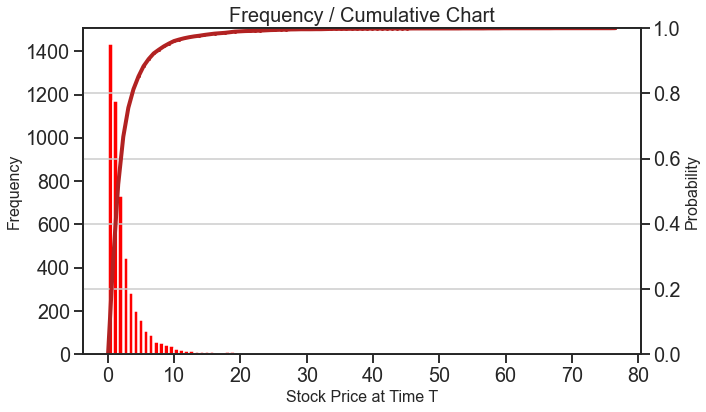

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


class Histplot:
    def __init__(self, x_data, num_bins, linetype='ro-', title=None, xlabel=None, ylabels=None, fsize=(20, 20), df_line=1):
        """
        :param x_data: data x list
                 :param num_bins: the number of x groups
                 :param linetype: The style of the cumulative frequency curve, the default is red solid point
                 :param legends: legend name, default is "linear fitting result", "actual measured value"
                 :param xlabel: the name of the x axis title, default is "data x"
                 :param ylabels: double y axis title name, the default is "count", "cumulative frequency"
                 :param df_line: Whether to display the cumulative frequency curve
        """
        if title is None:
            title = "Frequency / Cumulative Chart"
        if xlabel is None:
            xlabel = "Stock Price at Time T"
        if ylabels is None:
            ylabels = ["Frequency", "Probability"]
        self.x_data = x_data
        self.num_bins = num_bins
        self.linetype = linetype
        self.fsize = fsize
        self.title = title
        self.xlabel = xlabel
        self.ylabels = ylabels
        self.df_line = df_line

    def change_title(self, new_title):
        # Change the title name to new_legends
        self.title = new_title

    def change_ylabel(self, new_labels):
        # Change the title of the dual y axis to new_labels
        self.ylabels = new_labels

    def change_xlabel(self, new_label):
        # Change the x-axis axis title to new_label
        self.xlabel = new_label

    def change_linetype(self, new_linetype):
        # Change the format of the cumulative frequency line to new_lintype
        self.linetype = new_linetype

    def draw_plot(self):
        fs = self.fsize  # Canvas size
        # Use the seaborn library to set the font size uniformly, which is 0.12 times of fgsize[1], that is, when the vertical size of the canvas is 1000, font_scale=1.2
        sns.set_style("ticks")
        sns.set_context("talk", font_scale=fs[1]*0.2)

        # Set canvas
        fig, ax = plt.subplots(figsize=fs)

        # ax: draw frequency histogram, not selectable
        n, bins, patches = ax.hist(self.x_data, self.num_bins, color = "red", rwidth=0.9, label=self.title[0])
        ax.set_title(self.title, fontsize=20)
        ax.set_xlabel(self.xlabel, fontsize=16)
        ax.set_ylabel(self.ylabels[0],  fontsize=16)

        # ax2: Draw cumulative frequency curve, optional
        if self.df_line:
            leiji_n = [sum(n[:i]) / M for i in range(len(n) + 1)]
            ax2 = ax.twinx()
            ax2.plot(bins, leiji_n, self.linetype, ms=fs[0]*0.2, color="firebrick", linewidth=4, label=self.title[0])
            ax2.set_ylim(0, 1)
            ax2.set_ylabel(self.ylabels[1], fontsize=16)

        # Display multiple legends
        # fig.legend(loc=1, bbox_to_anchor=(1, 1), bbox_transform=ax.transAxes)
        # fig.tight_layout()
        plt.grid()
        plt.show()


if __name__ == "__main__":
    bins = 100  # Data grouping
    plot1 = Histplot(df['ST'], num_bins=bins, fsize=(10, 6))
    plot1.draw_plot()

# Plain Vanilla Call Option

In [8]:
K = 1.251

In [9]:
df['Payoff'] = 0.00000
for i in range(0,M):
    if df['ST'][i] > K:
        df['Payoff'][i] = (df['ST'][i]-K)
    else:
        df['Payoff'][i] = 0.0000
df['PV'] = np.exp(-r*T)*df['Payoff']
df

,S0,Normsinv,ST,Payoff,PV
0,2.521,-0.092169,1.300490,0.049490,0.047902
1,2.521,1.523005,7.563096,6.312096,6.109639
2,2.521,0.930042,3.962804,2.711804,2.624825
3,2.521,0.775292,3.347702,2.096702,2.029452
4,2.521,0.646416,2.908970,1.657970,1.604792
...,...,...,...,...,...
4995,2.521,-0.183854,1.176808,0.000000,0.000000
4996,2.521,0.710470,3.119328,1.868328,1.808403
4997,2.521,-0.286652,1.052065,0.000000,0.000000
4998,2.521,-1.116901,0.425616,0.000000,0.000000


In [10]:
Call = np.mean(df['PV'])
print("The value of the plain vanilla call option is:","{:.4f}".format(Call))

The value of the plain vanilla call option is: 1.6642


In [11]:
Error = np.std(df['PV'])/np.sqrt(M)
print("The stochastic error of the plain vanilla call option is:","{:.3%}".format(Error))

The stochastic error of the plain vanilla call option is: 5.548%


In [12]:
Prob = sum(df['Payoff']>0)/M
print("The probability to exercise the plain vanilla call option is:","{:.2%}".format(Prob))

The probability to exercise the plain vanilla call option is: 55.48%


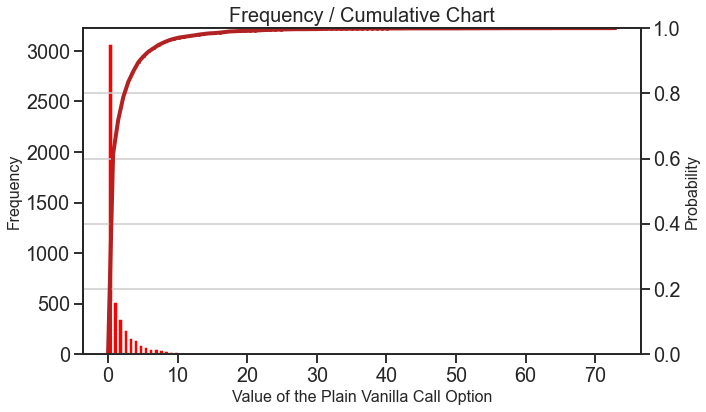

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


class Histplot:
    def __init__(self, x_data, num_bins, linetype='ro-', title=None, xlabel=None, ylabels=None, fsize=(20, 20), df_line=1):
        """
        :param x_data: data x list
                 :param num_bins: the number of x groups
                 :param linetype: The style of the cumulative frequency curve, the default is red solid point
                 :param legends: legend name, default is "linear fitting result", "actual measured value"
                 :param xlabel: the name of the x axis title, default is "data x"
                 :param ylabels: double y axis title name, the default is "count", "cumulative frequency"
                 :param df_line: Whether to display the cumulative frequency curve
        """
        if title is None:
            title = "Frequency / Cumulative Chart"
        if xlabel is None:
            xlabel = "Value of the Plain Vanilla Call Option"
        if ylabels is None:
            ylabels = ["Frequency", "Probability"]
        self.x_data = x_data
        self.num_bins = num_bins
        self.linetype = linetype
        self.fsize = fsize
        self.title = title
        self.xlabel = xlabel
        self.ylabels = ylabels
        self.df_line = df_line

    def change_title(self, new_title):
        # Change the title name to new_legends
        self.title = new_title

    def change_ylabel(self, new_labels):
        # Change the title of the dual y axis to new_labels
        self.ylabels = new_labels

    def change_xlabel(self, new_label):
        # Change the x-axis axis title to new_label
        self.xlabel = new_label

    def change_linetype(self, new_linetype):
        # Change the format of the cumulative frequency line to new_lintype
        self.linetype = new_linetype

    def draw_plot(self):
        fs = self.fsize  # Canvas size
        # Use the seaborn library to set the font size uniformly, which is 0.12 times of fgsize[1], that is, when the vertical size of the canvas is 1000, font_scale=1.2
        sns.set_style("ticks")
        sns.set_context("talk", font_scale=fs[1]*0.2)

        # Set canvas
        fig, ax = plt.subplots(figsize=fs)

        # ax: draw frequency histogram, not selectable
        n, bins, patches = ax.hist(self.x_data, self.num_bins, color = "red", rwidth=0.9, label=self.title[0])
        ax.set_title(self.title, fontsize=20)
        ax.set_xlabel(self.xlabel, fontsize=16)
        ax.set_ylabel(self.ylabels[0],  fontsize=16)

        # ax2: Draw cumulative frequency curve, optional
        if self.df_line:
            leiji_n = [sum(n[:i]) / M for i in range(len(n) + 1)]
            ax2 = ax.twinx()
            ax2.plot(bins, leiji_n, self.linetype, ms=fs[0]*0.2, color="firebrick", linewidth=4, label=self.title[0])
            ax2.set_ylim(0, 1)
            ax2.set_ylabel(self.ylabels[1], fontsize=16)

        # Display multiple legends
        # fig.legend(loc=1, bbox_to_anchor=(1, 1), bbox_transform=ax.transAxes)
        # fig.tight_layout()
        plt.grid()
        plt.show()


if __name__ == "__main__":
    bins = 100  # Data grouping
    plot1 = Histplot(df['PV'], num_bins=bins, fsize=(10, 6))
    plot1.draw_plot()

# Plain Vanilla Put Option

In [14]:
K = 1.251

In [15]:
df['Payoff'] = 0.00000
for i in range(0,M):
    if K > df['ST'][i]:
        df['Payoff'][i] = (K-df['ST'][i])
    else:
        df['Payoff'][i] = 0.0000
df['PV'] = np.exp(-r*T)*df['Payoff']
df

,S0,Normsinv,ST,Payoff,PV
0,2.521,-0.092169,1.300490,0.000000,0.000000
1,2.521,1.523005,7.563096,0.000000,0.000000
2,2.521,0.930042,3.962804,0.000000,0.000000
3,2.521,0.775292,3.347702,0.000000,0.000000
4,2.521,0.646416,2.908970,0.000000,0.000000
...,...,...,...,...,...
4995,2.521,-0.183854,1.176808,0.074192,0.071813
4996,2.521,0.710470,3.119328,0.000000,0.000000
4997,2.521,-0.286652,1.052065,0.198935,0.192555
4998,2.521,-1.116901,0.425616,0.825384,0.798910


In [16]:
Put = np.mean(df['PV'])
print("The value of the plain vanilla put option is:","{:.4f}".format(Put))

The value of the plain vanilla put option is: 0.2592


In [17]:
Error1 = np.std(df['PV'])/np.sqrt(M)
print("The stochastic error of the plain vanilla put option is:","{:.3%}".format(Error1))

The stochastic error of the plain vanilla put option is: 0.503%


In [18]:
Prob1 = sum(df['Payoff']>0)/M
print("The probability to exercise the plain vanilla call option is:","{:.2%}".format(Prob1))

The probability to exercise the plain vanilla call option is: 44.52%


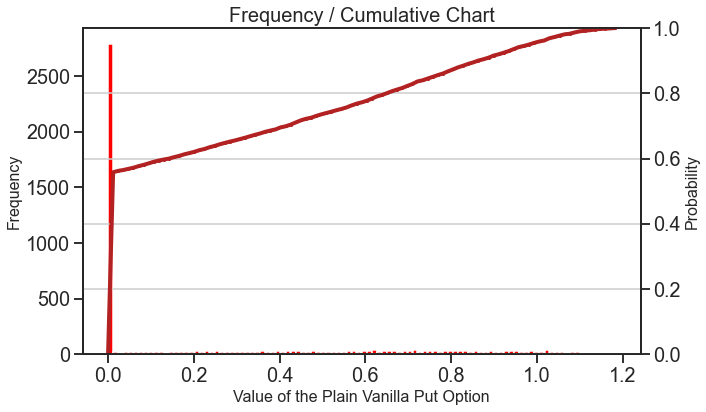

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


class Histplot:
    def __init__(self, x_data, num_bins, linetype='ro-', title=None, xlabel=None, ylabels=None, fsize=(20, 20), df_line=1):
        """
        :param x_data: data x list
                 :param num_bins: the number of x groups
                 :param linetype: The style of the cumulative frequency curve, the default is red solid point
                 :param legends: legend name, default is "linear fitting result", "actual measured value"
                 :param xlabel: the name of the x axis title, default is "data x"
                 :param ylabels: double y axis title name, the default is "count", "cumulative frequency"
                 :param df_line: Whether to display the cumulative frequency curve
        """
        if title is None:
            title = "Frequency / Cumulative Chart"
        if xlabel is None:
            xlabel = "Value of the Plain Vanilla Put Option"
        if ylabels is None:
            ylabels = ["Frequency", "Probability"]
        self.x_data = x_data
        self.num_bins = num_bins
        self.linetype = linetype
        self.fsize = fsize
        self.title = title
        self.xlabel = xlabel
        self.ylabels = ylabels
        self.df_line = df_line

    def change_title(self, new_title):
        # Change the title name to new_legends
        self.title = new_title

    def change_ylabel(self, new_labels):
        # Change the title of the dual y axis to new_labels
        self.ylabels = new_labels

    def change_xlabel(self, new_label):
        # Change the x-axis axis title to new_label
        self.xlabel = new_label

    def change_linetype(self, new_linetype):
        # Change the format of the cumulative frequency line to new_lintype
        self.linetype = new_linetype

    def draw_plot(self):
        fs = self.fsize  # Canvas size
        # Use the seaborn library to set the font size uniformly, which is 0.12 times of fgsize[1], that is, when the vertical size of the canvas is 1000, font_scale=1.2
        sns.set_style("ticks")
        sns.set_context("talk", font_scale=fs[1]*0.2)

        # Set canvas
        fig, ax = plt.subplots(figsize=fs)

        # ax: draw frequency histogram, not selectable
        n, bins, patches = ax.hist(self.x_data, self.num_bins, color = "red", rwidth=0.9, label=self.title[0])
        ax.set_title(self.title, fontsize=20)
        ax.set_xlabel(self.xlabel, fontsize=16)
        ax.set_ylabel(self.ylabels[0],  fontsize=16)

        # ax2: Draw cumulative frequency curve, optional
        if self.df_line:
            leiji_n = [sum(n[:i]) / M for i in range(len(n) + 1)]
            ax2 = ax.twinx()
            ax2.plot(bins, leiji_n, self.linetype, ms=fs[0]*0.2, color="firebrick", linewidth=4, label=self.title[0])
            ax2.set_ylim(0, 1)
            ax2.set_ylabel(self.ylabels[1], fontsize=16)

        # Display multiple legends
        # fig.legend(loc=1, bbox_to_anchor=(1, 1), bbox_transform=ax.transAxes)
        # fig.tight_layout()
        plt.grid()
        plt.show()


if __name__ == "__main__":
    bins = 100  # Data grouping
    plot1 = Histplot(df['PV'], num_bins=bins, fsize=(10, 6))
    plot1.draw_plot()